In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# kaggle functions
def clean_text(txt):
    return re.sub('[^A-Za-z0-9]+', ' ', str(txt).lower()).strip()

In [3]:
df = pd.DataFrame(pd.read_csv('../resources/combined_data/train_with_unclean_text.csv'))
df.head()

,Unnamed: 0,Id,pub_title,dataset_title,dataset_label,cleaned_label,text
0,0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,Section title: What is this study about? | Tex...
1,1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,Section title: November 2004 | Text: Dropping ...
2,2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,Section title: Differences in Outcomes for Fem...
3,3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,Section title: Abstract | Text: Federal Reserv...
4,4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,Section title: Abstract | Text: This article i...


In [4]:
label_list = df.cleaned_label.unique()
label_words = []
for label in label_list:
    for word in label.split(' '):
        label_words.append(word)
        
word_counter = {}
for word in label_words:
    if word in word_counter:
        word_counter[word] += 1
    else:
        word_counter[word] = 1

label_word_df = pd.DataFrame.from_dict(data=word_counter, orient='index')\
    .reset_index().rename(columns={'index':'word',0:'number'})\
    .sort_values(by='number',ascending=False).reset_index(drop=True)

label_word_df

,word,number
0,and,43
1,of,40
2,survey,35
3,national,26
4,science,24
...,...,...
193,state,1
194,safety,1
195,niagads,1
196,risk,1


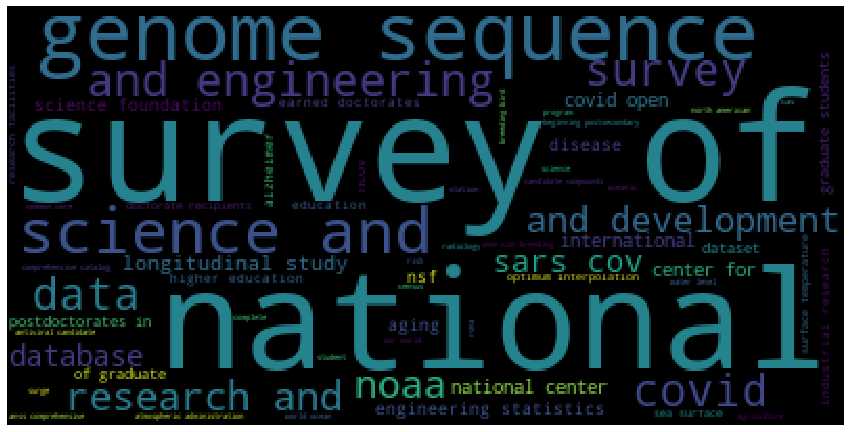

In [7]:
# labels wordcloud
text = ' '.join(df['cleaned_label'].unique())
wordcloud = WordCloud(width=800, height=400).generate(str(text))

plt.figure(figsize=(15,10))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
# add label sentences columns
label_sentences = []

for index, row in df.iterrows():

    text = row.text
    label = row.dataset_label
    
    sentences = re.findall(fr'([^.]*?{label}[^.]*\.)', text)
        
    sentence_join = ''.join(str(sentences))
    
    sentence_no_label = sentence_join.replace(str(label), ' ')
    
    label_sentences.append(clean_text(sentence_no_label))
        
#     row['label_sentences'] = clean_text(sentence_join)

    if index % 1000 == 0:
        print(index)

label_sentences[:5]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


['section title what is this study about text this study used data from the nels 88 to examine the effects of dual enrollment programs for high school students on college degree attainment section title degree attainment text any college degree attainment the study author collected information on college degree attainment from the fourth follow up of the collected in 2000 section title bachelor s degree attainment text the study author collected information on bachelor s degree attainment from the fourth follow up of the collected in 2000',
 'using data on public and private school students from the of 1988 nels 88 berktold geis and kaufman 1998 examined the educational attainment of the 21 percent of 1988 eighth graders who had dropped out of high school at least once between eighth grade and the spring of 1994 2 years after they would have graduated if they had finished with the majority of their cohort department of education national center for education statistics of 1988 nels 88 

In [ ]:
df['label_sentences'] = label_sentences
df['text'] = clean_text(df['text'])
df['label_sentences'] = clean_text(df['label_sentences'])
df

In [12]:
sentences

[' After data cleaning and chemical structure standardization, Bemis-Murcko scaffolds [28] were extracted from the ligands in the data set and grouped by similarity into structural queries for subsequent substructure searches in Drug-Bank [7] and the CAS COVID-19 antiviral candidate compounds data set (available upon request at https ://www.']

In [ ]:
df.to_csv('../resources/combined_data/train_label_sentences.csv')

In [ ]:
len(df.label_sentences.unique())

In [ ]:
# word that appear around dataset label
text = ' '.join(df['label_sentences'].unique())
wordcloud = WordCloud(width=800, height=400).generate(str(label_sent_join))

plt.figure(figsize=(15,10))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()